# IMPORT LIBRARIES


In [330]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATA

In [331]:
df = pd.read_csv('gpu_specs_v6.csv')

In [332]:
df.head(10)

,manufacturer,productName,releaseYear,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,pixelShader,vertexShader,igp,bus,memType,gpuChip
0,NVIDIA,GeForce RTX 4050,2023.0,8.0,128.0,1925,2250.0,3840.0,120,48,NaN,NaN,No,PCIe 4.0 x16,GDDR6,AD106
1,Intel,Arc A350M,2022.0,4.0,64.0,300,1500.0,768.0,48,24,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
2,Intel,Arc A370M,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
3,Intel,Arc A380,2022.0,4.0,64.0,300,1500.0,1024.0,64,32,NaN,NaN,No,PCIe 4.0 x8,GDDR6,DG2-128
4,Intel,Arc A550M,2022.0,8.0,128.0,300,1500.0,2048.0,128,64,NaN,NaN,No,PCIe 4.0 x16,GDDR6,DG2-512
5,Intel,Arc A730M,2022.0,12.0,192.0,300,1500.0,3072.0,192,96,NaN,NaN,No,PCIe 4.0 x16,GDDR6,DG2-512
6,Intel,Arc A770,2022.0,16.0,256.0,300,1500.0,4096.0,256,128,NaN,NaN,No,PCIe 4.0 x16,GDDR6,DG2-512
7,Intel,Arc A770M,2022.0,16.0,256.0,300,1500.0,4096.0,256,128,NaN,NaN,No,PCIe 4.0 x16,GDDR6,DG2-512
8,Intel,Arc A780,2022.0,16.0,256.0,300,1093.0,4096.0,256,128,NaN,NaN,No,PCIe 4.0 x16,GDDR6X,DG2-512
9,Intel,Arctic Sound-M,2022.0,16.0,4096.0,900,1200.0,8192.0,256,128,NaN,NaN,No,PCIe 4.0 x16,HBM2e,Arctic Sound


In [333]:
df.drop(['releaseYear', 'pixelShader', 'vertexShader', 'gpuChip', 'igp'] ,axis=1 , inplace = True)

In [334]:
df.head()

,manufacturer,productName,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,bus,memType
0,NVIDIA,GeForce RTX 4050,8.0,128.0,1925,2250.0,3840.0,120,48,PCIe 4.0 x16,GDDR6
1,Intel,Arc A350M,4.0,64.0,300,1500.0,768.0,48,24,PCIe 4.0 x8,GDDR6
2,Intel,Arc A370M,4.0,64.0,300,1500.0,1024.0,64,32,PCIe 4.0 x8,GDDR6
3,Intel,Arc A380,4.0,64.0,300,1500.0,1024.0,64,32,PCIe 4.0 x8,GDDR6
4,Intel,Arc A550M,8.0,128.0,300,1500.0,2048.0,128,64,PCIe 4.0 x16,GDDR6


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2889 entries, 0 to 2888
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   manufacturer   2889 non-null   object 
 1   productName    2889 non-null   object 
 2   memSize        2477 non-null   float64
 3   memBusWidth    2477 non-null   float64
 4   gpuClock       2889 non-null   int64  
 5   memClock       2477 non-null   float64
 6   unifiedShader  2065 non-null   float64
 7   tmu            2889 non-null   int64  
 8   rop            2889 non-null   int64  
 9   bus            2889 non-null   object 
 10  memType        2889 non-null   object 
dtypes: float64(4), int64(3), object(4)
memory usage: 248.4+ KB


# DATA CLEANSING

## MISSING VALUE

In [336]:
df.isna().sum()

manufacturer       0
productName        0
memSize          412
memBusWidth      412
gpuClock           0
memClock         412
unifiedShader    824
tmu                0
rop                0
bus                0
memType            0
dtype: int64

In [337]:
df.isna().sum() * 100 / len(df)

manufacturer      0.00000
productName       0.00000
memSize          14.26099
memBusWidth      14.26099
gpuClock          0.00000
memClock         14.26099
unifiedShader    28.52198
tmu               0.00000
rop               0.00000
bus               0.00000
memType           0.00000
dtype: float64

In [338]:
df['memSize'].fillna(df['memSize'].median)

0         8.0
1         4.0
2         4.0
3         4.0
4         8.0
        ...  
2884    0.016
2885    0.016
2886    0.032
2887      4.0
2888      8.0
Name: memSize, Length: 2889, dtype: object

In [339]:
df['memBusWidth'].fillna(df['memBusWidth'].median)

0       128.0
1        64.0
2        64.0
3        64.0
4       128.0
        ...  
2884    128.0
2885    128.0
2886    128.0
2887    128.0
2888    128.0
Name: memBusWidth, Length: 2889, dtype: object

In [340]:
df['memClock'].fillna(df['memClock'].median)

0       2250.0
1       1500.0
2       1500.0
3       1500.0
4       1500.0
         ...  
2884     166.0
2885     166.0
2886     166.0
2887    2133.0
2888    2133.0
Name: memClock, Length: 2889, dtype: object

In [341]:
df['unifiedShader'].fillna(df['unifiedShader'].median)

0                                                  3840.0
1                                                   768.0
2                                                  1024.0
3                                                  1024.0
4                                                  2048.0
                              ...                        
2884    <bound method NDFrame._add_numeric_operations....
2885    <bound method NDFrame._add_numeric_operations....
2886    <bound method NDFrame._add_numeric_operations....
2887                                                640.0
2888                                                768.0
Name: unifiedShader, Length: 2889, dtype: object

In [342]:
df = df.dropna()

In [343]:
df.isna().sum()

manufacturer     0
productName      0
memSize          0
memBusWidth      0
gpuClock         0
memClock         0
unifiedShader    0
tmu              0
rop              0
bus              0
memType          0
dtype: int64

## DUPLICATED DATA CHECK

In [344]:
df.duplicated().sum()

9

In [345]:
df[df.duplicated(keep=False)].sort_values('manufacturer').head(10)

,manufacturer,productName,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,bus,memType
1671,AMD,Radeon HD 6550M,1.024,128.0,600,900.0,400.0,20,8,MXM-II,DDR3
1670,AMD,Radeon HD 6550M,1.024,128.0,600,900.0,400.0,20,8,MXM-II,DDR3
652,AMD,FirePro W4170M,2.000,128.0,825,1000.0,384.0,24,8,PCIe 3.0 x8,GDDR5
824,AMD,FirePro W4170M,2.000,128.0,825,1000.0,384.0,24,8,PCIe 3.0 x8,GDDR5
157,NVIDIA,GeForce GTX 1650 Ti Mobile,4.000,128.0,1350,1500.0,1024.0,64,32,PCIe 3.0 x16,GDDR6
1244,NVIDIA,GeForce GTX 650,1.024,128.0,1058,1250.0,384.0,32,16,PCIe 3.0 x16,GDDR5
1227,NVIDIA,GeForce GT 630M,1.024,64.0,660,900.0,96.0,16,4,MXM-A (3.0),DDR3
1226,NVIDIA,GeForce GT 630M,1.024,64.0,660,900.0,96.0,16,4,MXM-A (3.0),DDR3
1003,NVIDIA,GeForce GTX 650,1.024,128.0,1058,1250.0,384.0,32,16,PCIe 3.0 x16,GDDR5
847,NVIDIA,GeForce GT 710,2.000,64.0,954,900.0,192.0,16,8,PCIe 2.0 x8,DDR3


In [346]:
df = df.drop_duplicates()

In [347]:
df.duplicated().sum()

0

# STANDARD EDA

## STATISTICAL SUMMARY

In [348]:
categoricals = ['manufacturer', 'productName', 'bus', 'memType']

numericals = ['memSize', 'memBusWidth', 'gpuClock', 'memClock', 'unifiedShader', 'tmu', 'rop']

In [349]:
df[numericals].describe()

,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop
count,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000
mean,4.366116,326.094361,862.724396,1103.786536,1182.071346,72.115075,27.642117
std,8.252672,763.899227,326.889643,409.809392,1771.561211,85.216487,28.855399
min,0.128000,32.000000,300.000000,266.000000,8.000000,4.000000,0.000000
25%,1.024000,128.000000,625.000000,800.000000,192.000000,20.000000,8.000000
50%,2.000000,128.000000,796.000000,1000.000000,496.000000,40.000000,16.000000
75%,4.000000,256.000000,1005.750000,1375.000000,1536.000000,96.000000,32.000000
max,128.000000,8192.000000,2331.000000,2257.000000,17408.000000,880.000000,256.000000


In [350]:
df[categoricals].describe()

,manufacturer,productName,bus,memType
count,1738,1738,1738,1738
unique,4,1618,21,15
top,NVIDIA,GeForce GT 555M,PCIe 2.0 x16,GDDR5
freq,906,5,547,721


In [351]:
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of manufacturer column
NVIDIA    906
AMD       605
ATI       205
Intel      22
Name: manufacturer, dtype: int64 

Value counts of productName column
GeForce GT 555M          5
GeForce GT 635M          4
Radeon RX 560X Mobile    4
GeForce GTX 965M         4
GeForce 610M             3
                        ..
GRID M60-4A              1
GRID M60-2Q              1
GRID M60-1Q              1
GeForce GTX TITAN X      1
Xe DG1-SDV               1
Name: productName, Length: 1618, dtype: int64 

Value counts of bus column
PCIe 2.0 x16    547
PCIe 3.0 x16    495
PCIe 3.0 x8     171
PCIe 4.0 x16    108
MXM-B (3.0)      97
MXM-A (3.0)      67
PCIe 1.0 x16     63
PCIe 4.0 x8      39
MXM-II           34
IGP              25
PCIe 3.0 x4      18
PCI              12
AGP 8x           11
MXM-HE           10
PCIe 2.0 x8      10
PCIe 4.0 x4       9
PCIe 2.0 x1       8
PCIe 5.0 x16      5
MXM               4
MXM-I             4
MXM-IV            1
Name: bus, dtype: int64 

Value counts of memT

## UNIVARIATE ANALYSIS

### BOXPLOT

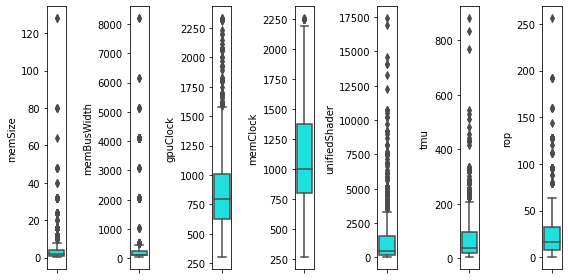

In [352]:
plt.figure(figsize=(8,4))

features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='cyan')
    plt.tight_layout()

In [353]:
# Detect Outliers Using IQR
Q1 = df[numericals].quantile(0.25)
 
Q3 = df[numericals].quantile(0.75)

iqr = Q3 - Q1

# Finding upper and lower limit
upper_limit = Q3 + 1.5 * iqr
lower_limit = Q1 - 1.5 * iqr

# Finding Outliers
df[df[numericals] > upper_limit]
df[df[numericals] < lower_limit]

# Trimming
new_df = df[df[numericals] < upper_limit]
new_df.shape

(1738, 11)

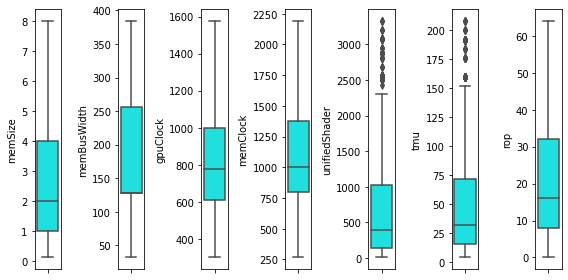

In [354]:
plt.figure(figsize=(8,4))

features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=new_df[features[i]], color='cyan')
    plt.tight_layout()

## Bivariate Analysis


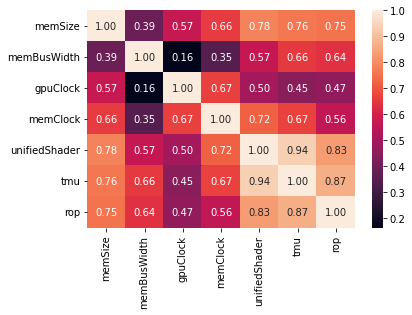

In [355]:
correlation = new_df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

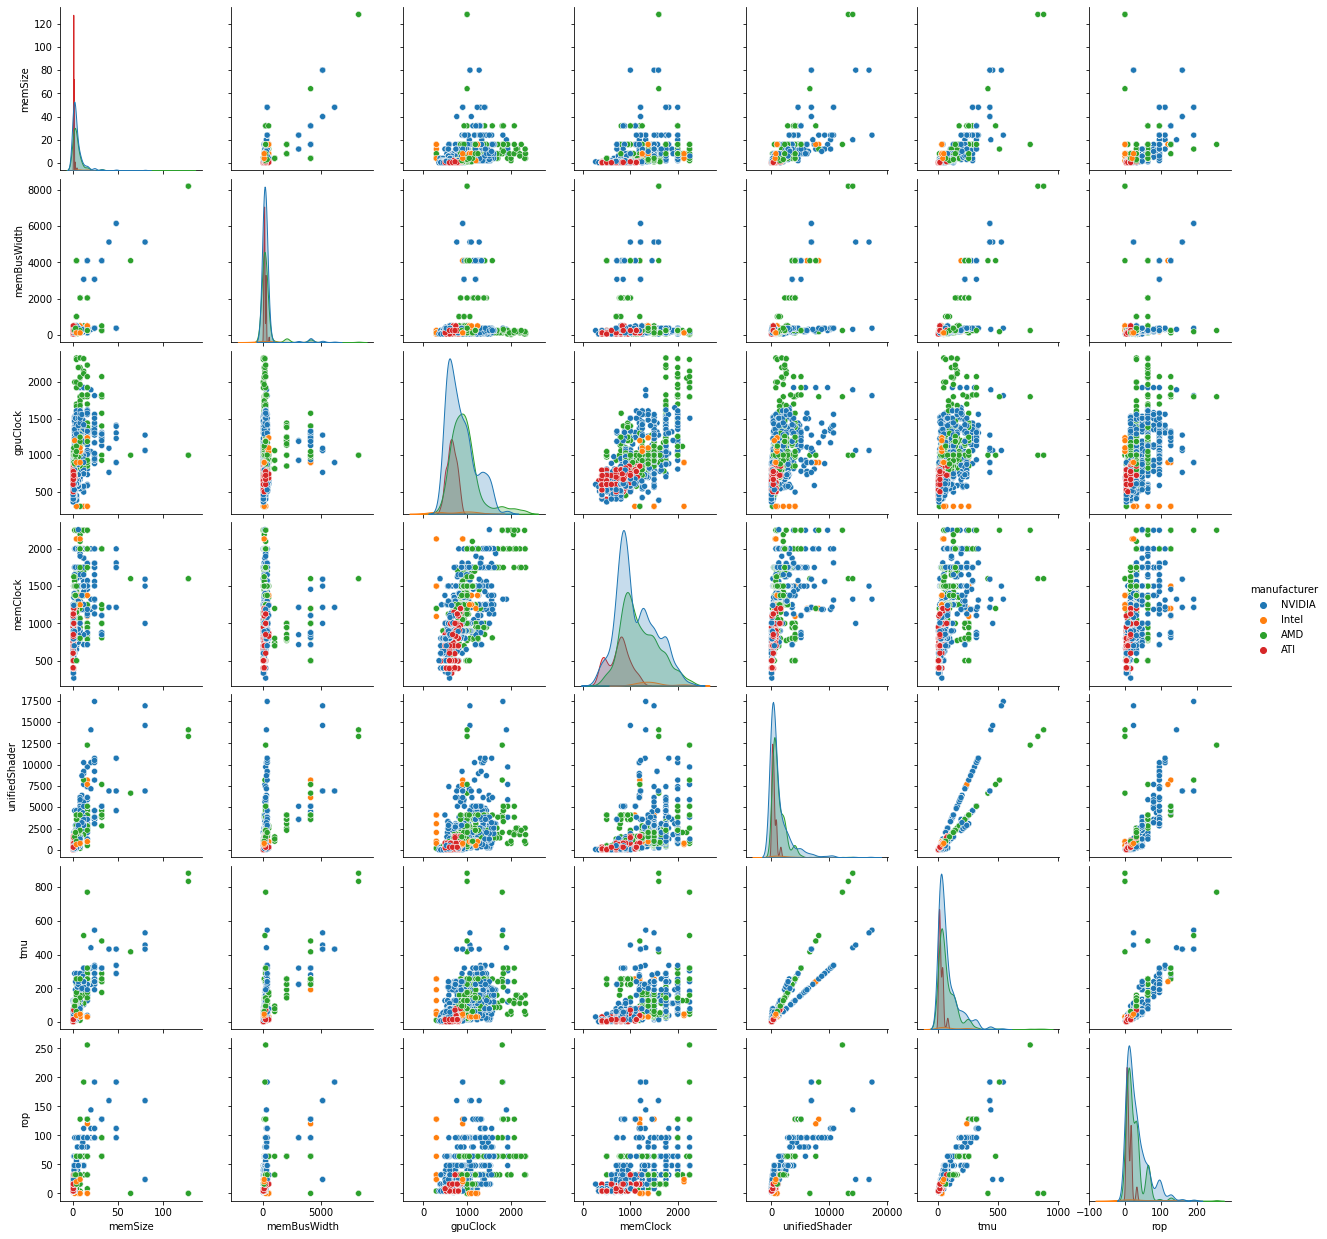

In [356]:
sns.pairplot(df, hue='manufacturer')

# DATA VISUALIZATION

In [357]:
df.head()

,manufacturer,productName,memSize,memBusWidth,gpuClock,memClock,unifiedShader,tmu,rop,bus,memType
0,NVIDIA,GeForce RTX 4050,8.0,128.0,1925,2250.0,3840.0,120,48,PCIe 4.0 x16,GDDR6
1,Intel,Arc A350M,4.0,64.0,300,1500.0,768.0,48,24,PCIe 4.0 x8,GDDR6
2,Intel,Arc A370M,4.0,64.0,300,1500.0,1024.0,64,32,PCIe 4.0 x8,GDDR6
3,Intel,Arc A380,4.0,64.0,300,1500.0,1024.0,64,32,PCIe 4.0 x8,GDDR6
4,Intel,Arc A550M,8.0,128.0,300,1500.0,2048.0,128,64,PCIe 4.0 x16,GDDR6


## Dominating GPU

In [358]:
manufac= (df['manufacturer'].value_counts(sort=False))
manufac

NVIDIA    906
Intel      22
AMD       605
ATI       205
Name: manufacturer, dtype: int64

In [359]:
manufac_names = (df['manufacturer'].unique())
list(manufac_names)

['NVIDIA', 'Intel', 'AMD', 'ATI']

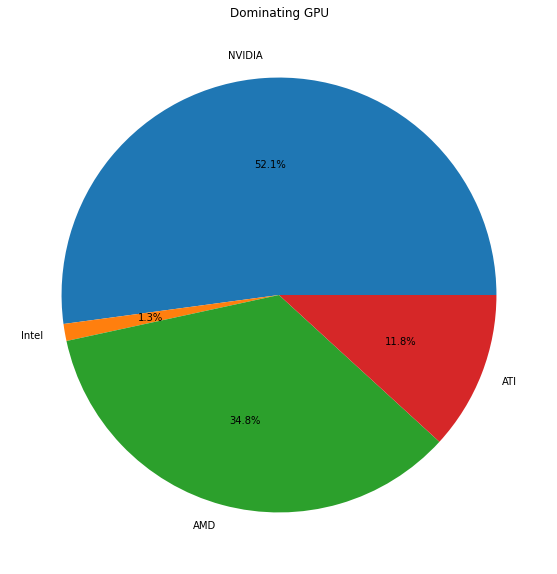

In [360]:
fig = plt.figure(figsize =(10, 10))
plt.pie(manufac, labels = manufac_names, autopct='%1.1f%%')
plt.title('Dominating GPU')
plt.show()

## Top 10 Product with the most unifiedShader

In [361]:
top10_prod = (df
            .groupby('productName')
            .agg(unified_Shader=('unifiedShader','count'))
            .reset_index()
            .sort_values('unified_Shader',ascending=False)
            .head(10)
            )
top10_prod

,productName,unified_Shader
354,GeForce GT 555M,5
575,GeForce GTX 965M,4
1463,Radeon RX 560X Mobile,4
370,GeForce GT 635M,4
182,GeForce 610M,3
294,GeForce G105M,3
1335,Radeon R7 250,3
1358,Radeon R7 A360,3
1329,Radeon R5 M430,3
324,GeForce GT 330 OEM,3


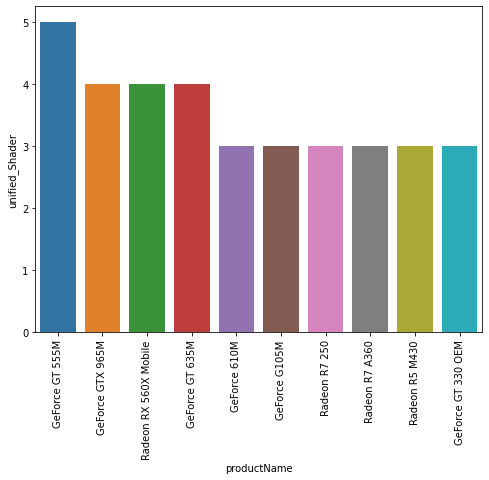

In [362]:
plt.figure(figsize=(8,6))
sns.barplot(data=top10_prod, x='productName', y='unified_Shader')
plt.xticks(rotation=90)
plt.show()

## Top 10 Product with the Best GPU Memory Performance

In [363]:
df['best_performance'] = df['memClock'] * df['memSize']

top10_prod = (df
            .groupby('productName')
            .agg(memory=('best_performance','sum'))
            .reset_index()
            .sort_values('memory',ascending=False)
            .head(10)
            )
top10_prod

,productName,memory
1226,Radeon Instinct MI250,204800.0
1227,Radeon Instinct MI250X,204800.0
2,A100 PCIe 80 GB,127440.0
4,A100 SXM4 80 GB,127440.0
659,H100 SXM5,120000.0
1224,Radeon Instinct MI210,102400.0
929,RTX A6000,96000.0
9,A40 PCIe,86976.0
903,Quadro RTX 8000 Passive,84000.0
902,Quadro RTX 8000,84000.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

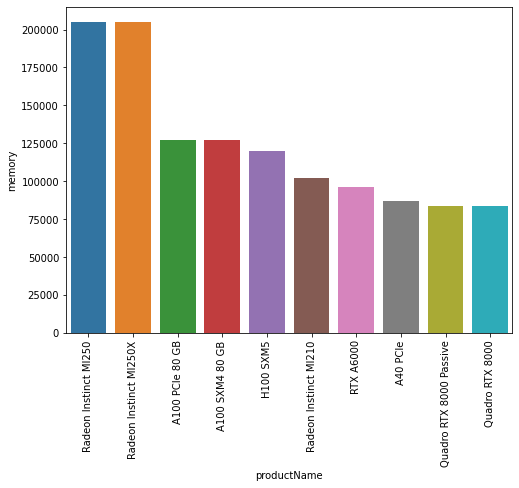

In [364]:
plt.figure(figsize=(8,6))
top10_prod['productName'] = top10_prod['productName'].astype(str)
sns.barplot(data=top10_prod, x='productName', y='memory')
plt.xticks(rotation=90)

# Predicting Memory Clock

In [365]:
df.drop(['manufacturer', 'productName', 'bus', 'memType', 'best_performance'],axis=1 , inplace = True)

## Split Data

In [366]:
# split train test
from sklearn.model_selection import train_test_split

feature = df.drop(columns='memClock')
target = df[['memClock']]

feature_df_pretrain, feature_df_test, target_df_pretrain, target_df_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_df_train, feature_df_validation, target_df_train, target_df_validation = train_test_split(feature_df_pretrain, target_df_pretrain, test_size=0.20, random_state=42)

## Checking VIF

In [367]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,memSize,3.807449
2,memBusWidth,2.130690
3,gpuClock,1.479381
4,unifiedShader,7.110117
5,tmu,11.221799
6,rop,4.358495


there is feature with high VIF score :
1. unifiedShader
2. tmu
3. rop

## Heatmap Correlation

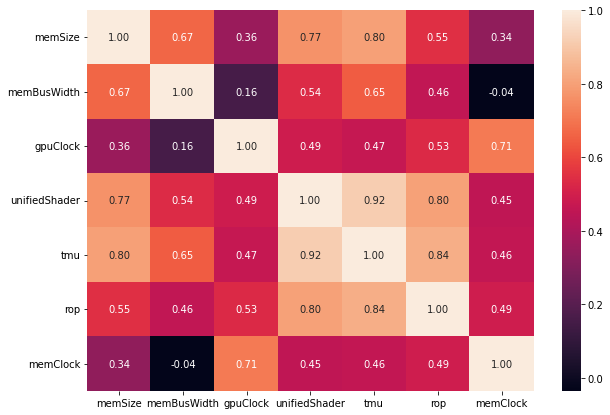

In [368]:
admit_df = pd.concat([feature_df_train, target_df_train], axis=1)
corr = admit_df.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

We choose to retain rop. Therefore, we need to drop:
1. unifiedShader
2. tmu

## Drop Data

In [369]:
# drop redundant features
feature_df_train = feature_df_train.drop(columns=['tmu', 'unifiedShader'])
feature_df_validation = feature_df_validation.drop(columns=['tmu', 'unifiedShader'])
feature_df_test = feature_df_test.drop(columns=['tmu', 'unifiedShader'])

## Checking VIF after drop data

In [370]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,memSize,2.170267
2,memBusWidth,1.926158
3,gpuClock,1.473917
4,rop,1.846930


## Ridge Reggression

In [371]:
from sklearn.linear_model import Ridge

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_df_train, y_df_train)
ridge_reg_pointone.fit(X_df_train, y_df_train)
ridge_reg_one.fit(X_df_train, y_df_train)
ridge_reg_ten.fit(X_df_train, y_df_train)

Ridge(alpha=10, random_state=42)

In [372]:
from sklearn.metrics import mean_squared_error

X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 255.7631996155254
RMSE of Ridge regression model with alpha = 0.1 is 255.76319842672984
RMSE of Ridge regression model with alpha = 1.0 is 255.76318654834023
RMSE of Ridge regression model with alpha = 10 is 255.7630687205319


In [373]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,435.429586
1,memSize,14.984059
2,memBusWidth,-0.229589
3,gpuClock,0.678453
4,rop,3.318339


### R-Square

In [374]:
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_df_train)

print('R-squared for training data is {}'.format(r2_score(y_df_train, y_predict_train)))

R-squared for training data is 0.6184346914667324


### Residual Plot

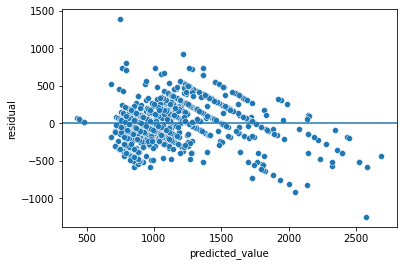

In [375]:
# calculate residuals
residual = y_df_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

### QQ Plot

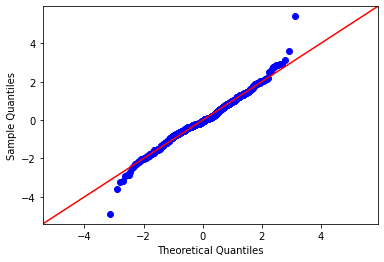

In [381]:
# QQplot
from sklearn.preprocessing import StandardScaler

std_resid = StandardScaler().fit_transform(residual.reshape(-1,1))
std_resid = np.array([value for nested_array in std_resid for value in nested_array])

import statsmodels.api as sm
sm.qqplot(std_resid, line='45')
plt.show()

### Training Error

In [376]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_df_train)

In [377]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_df_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_df_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_df_train, y_predict_train)))

RMSE for training data is 255.77992025978173
MAE for training data is 193.51784598883623
MAPE for training data is 0.2057470101655492


### Testing Error

In [378]:
# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test = ridge_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

In [379]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_df_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_df_test, y_predict_test)))

RMSE for testing data is 243.78581537564236
MAE for testing data is 189.07587441454473
MAPE for testing data is 0.1905878856633155


In [380]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_error(y_df_test, y_predict_test)
mean_absolute_percentage_error(y_df_test, y_predict_test)

0.1905878856633155